## ================================================
# 📌 Skill Gap Analysis - Exploratory Data Analysis (EDA)
# ================================================

### ----------------- STEP 1: Import Libraries  -----------------


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Make plots look nicer
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

### ----------------- STEP 2: Paths -----------------


In [ ]:
DATA_PATH = "Skill_Gap_Cleaned.csv"
OUTPUTS_PATH = "02_eda_outputs"

# Create outputs folder if not exists
os.makedirs(OUTPUTS_PATH, exist_ok=True)

### ----------------- STEP 4: Load Data -----------------

In [ ]:
df = pd.read_csv(DATA_PATH)
# Quick overview
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Dataset shape: (30038, 22)
Columns: ['name', 'job_title', 'salary_usd', 'salary_currency', 'salary', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'years_experience', 'industry', 'posting_date', 'application_deadline', 'job_description_length', 'benefits_score', 'company_name', 'age', 'skills']


,name,job_title,salary_usd,salary_currency,salary,experience_level,employment_type,company_location,company_size,employee_residence,...,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,age,skills
0,Matthew Hernandez,Senior Data Scientist,90376.0,USD,90886,Senior,Contract,China,Medium,China,...,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,41,"['ETL', 'Architecture', 'Power BI', 'Kafka', '..."
1,Tyler Mcdonald,Senior Software Engineer,61895.0,USD,88450,Senior,Contract,Canada,Medium,Ireland,...,Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,41,"['AWS', 'NLP', 'Recommendation Systems', 'Deep..."
2,Stacey Brown,Tech Lead,152626.0,USD,65087,Senior,Freelance,Switzerland,Large,South Korea,...,Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,44,"['React', 'Linux', 'Machine Learning', 'Java',..."
3,Wayne Mcdonald,Backend Developer,80215.0,USD,62121,Mid-level,Freelance,India,Medium,India,...,PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,31,"['Communication', 'Data Analysis', 'React', 'K..."
4,Lynn Mitchell,Software Engineer,54624.0,EUR,56739,Mid-level,Part-time,France,Small,Singapore,...,Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,33,"['NumPy', 'Spark', 'Kafka', 'Testing/QA']"


### ----------------- STEP 5: Data Info -----------------


In [ ]:
df.info()   # column types + nulls
df.describe(include="all").T  # summary stats
df.isnull().sum()  # missing values check


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30038 entries, 0 to 30037
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    30038 non-null  object 
 1   job_title               30038 non-null  object 
 2   salary_usd              30038 non-null  float64
 3   salary_currency         30038 non-null  object 
 4   salary                  30038 non-null  int64  
 5   experience_level        30038 non-null  object 
 6   employment_type         30038 non-null  object 
 7   company_location        30038 non-null  object 
 8   company_size            30038 non-null  object 
 9   employee_residence      30038 non-null  object 
 10  remote_ratio            30038 non-null  int64  
 11  required_skills         30038 non-null  object 
 12  education_required      30038 non-null  object 
 13  years_experience        30038 non-null  int64  
 14  industry                30038 non-null

,0
name,0
job_title,0
salary_usd,0
salary_currency,0
salary,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0


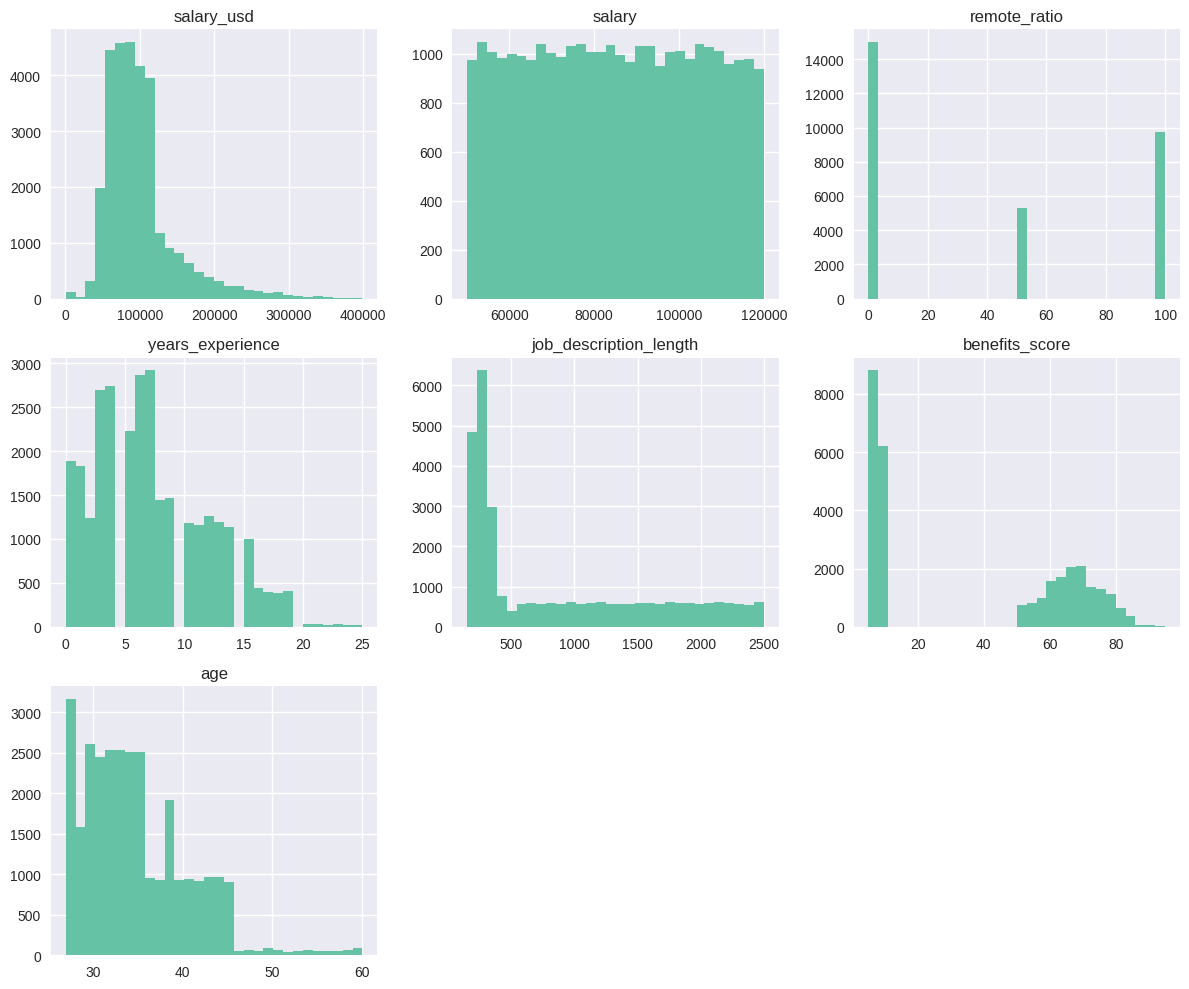

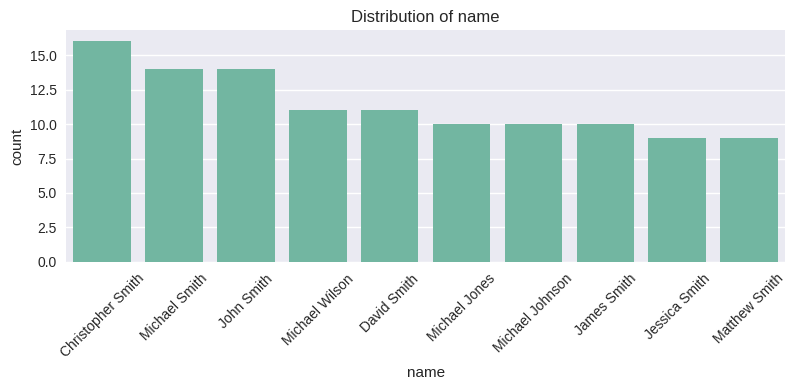

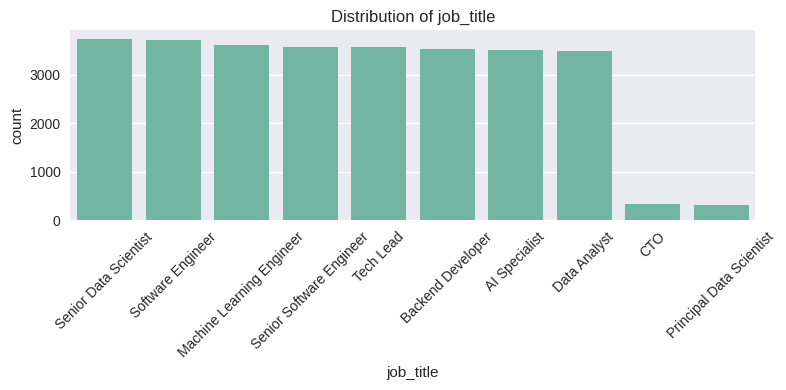

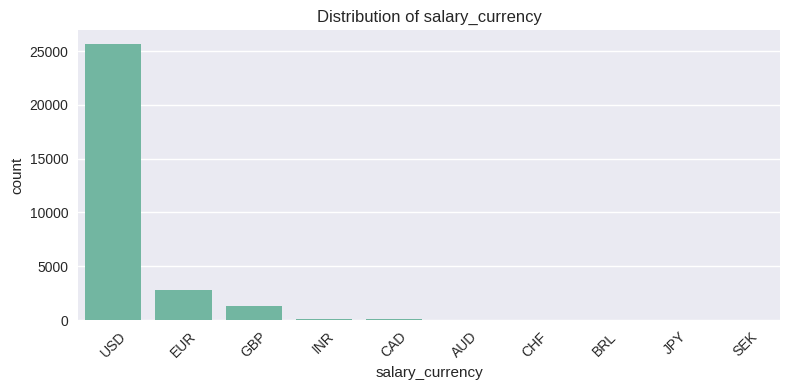

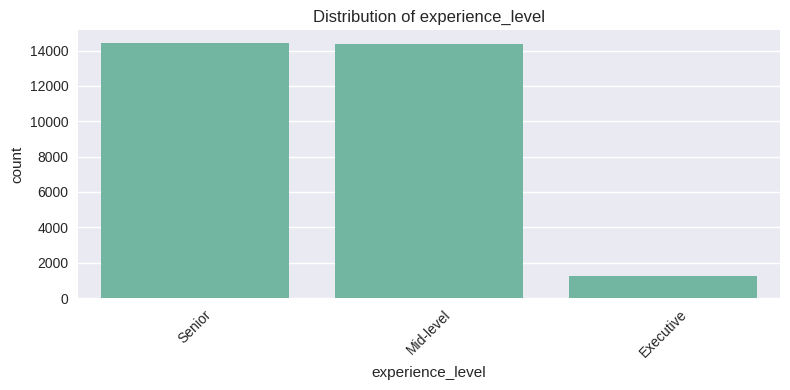

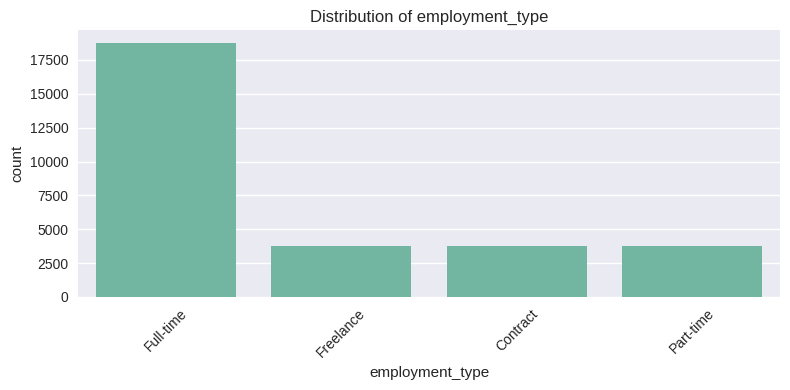

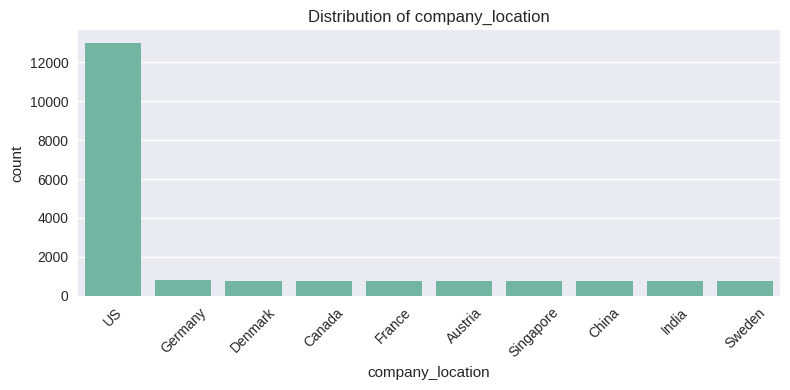

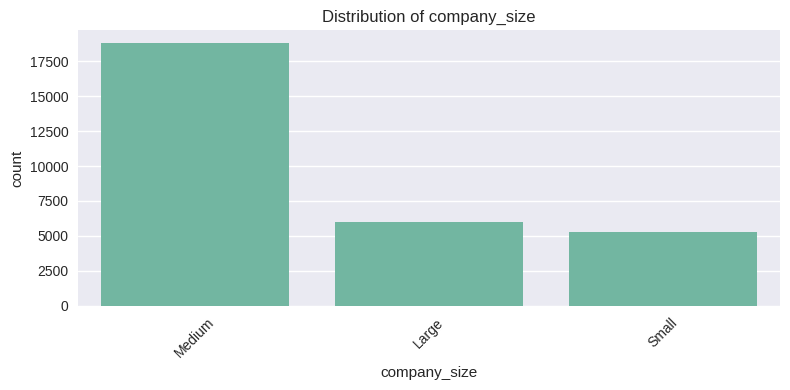

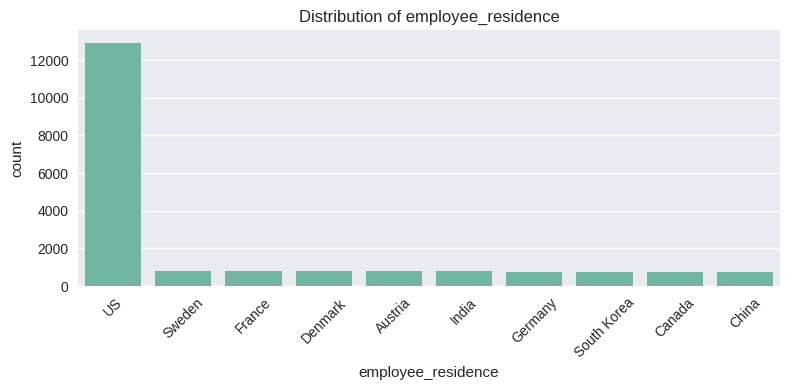

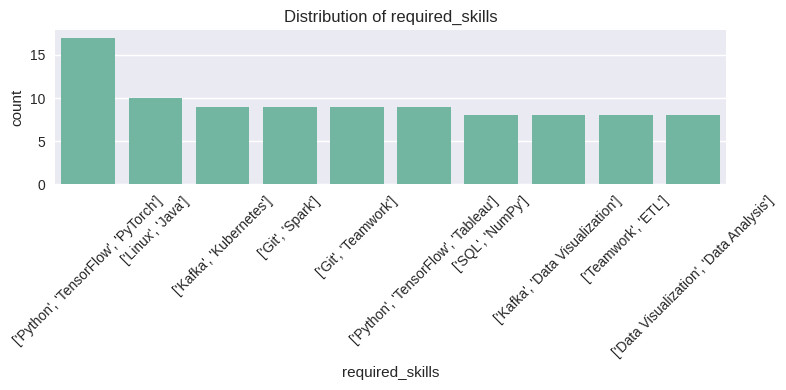

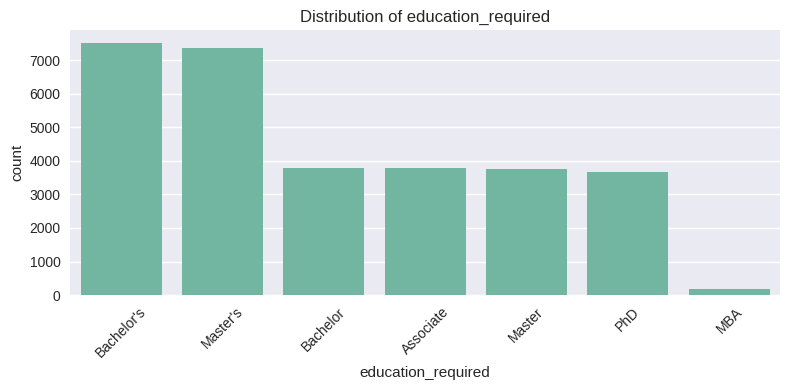

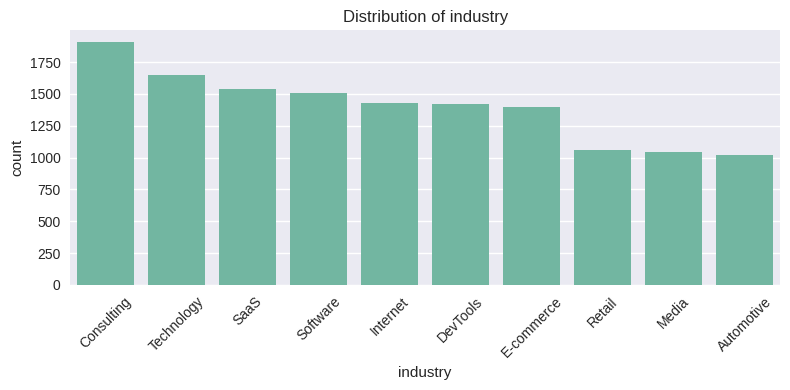

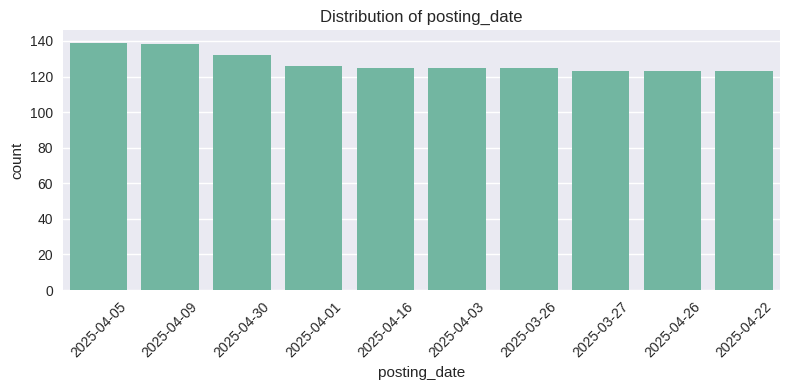

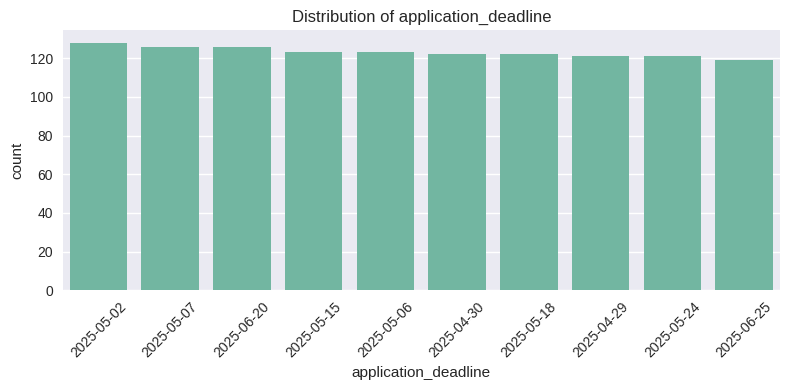

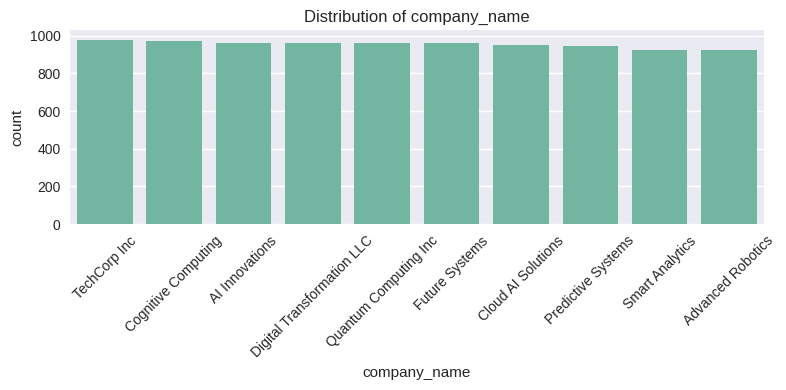

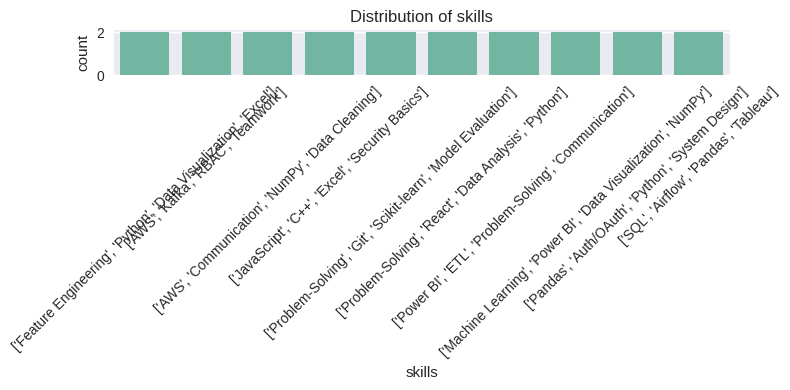

In [ ]:
# Numerical features distribution
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.savefig(f"{OUTPUTS_PATH}/numerical_distributions.png")
plt.show()

# Categorical features count plots
cat_cols = df.select_dtypes(exclude=np.number).columns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{OUTPUTS_PATH}/{col}_distribution.png")
    plt.show()


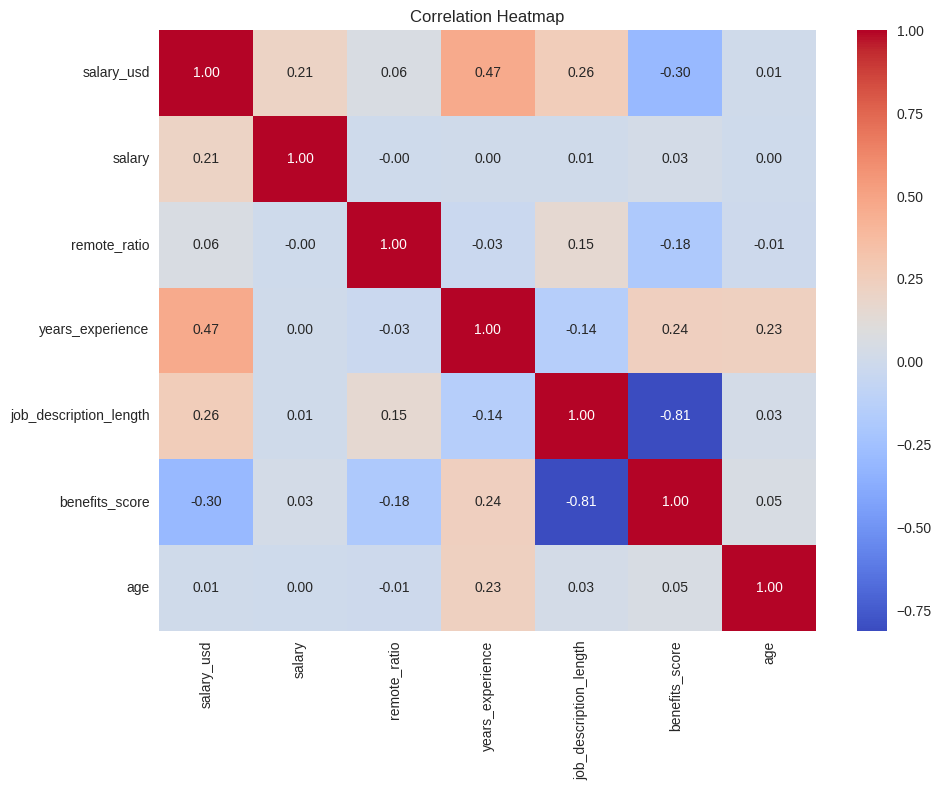

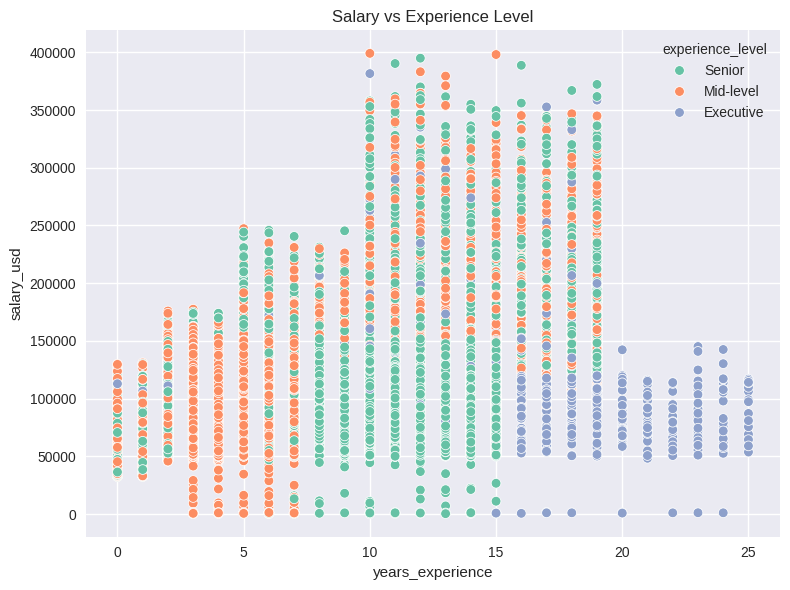

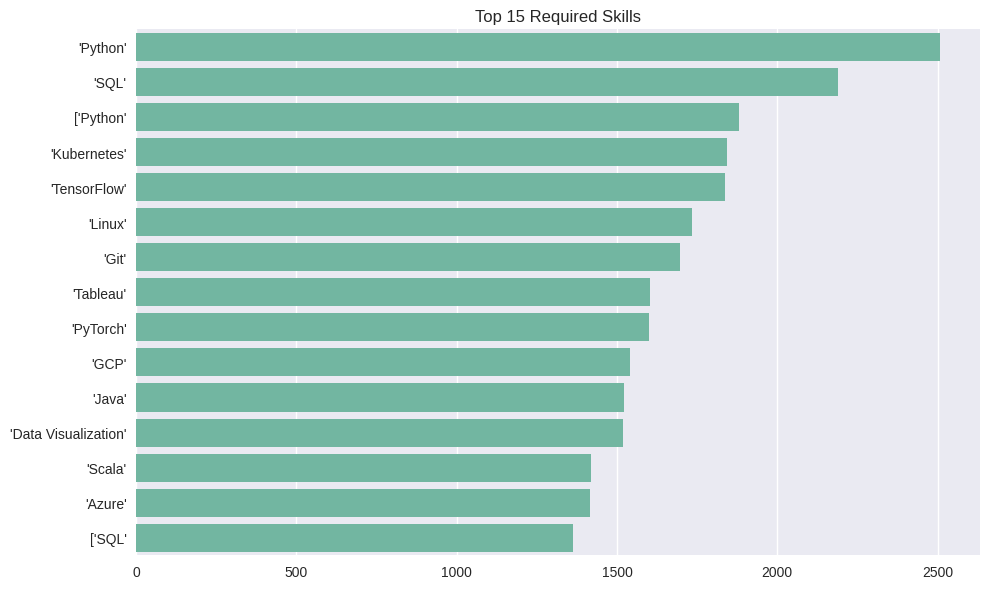

In [ ]:
# Correlation heatmap (numerical variables)
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(f"{OUTPUTS_PATH}/correlation_heatmap.png")
plt.show()

# Example: Salary vs Experience
if "salary_usd" in df.columns and "years_experience" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x="years_experience", y="salary_usd", hue="experience_level")
    plt.title("Salary vs Experience Level")
    plt.tight_layout()
    plt.savefig(f"{OUTPUTS_PATH}/salary_vs_experience.png")
    plt.show()

# Example: Top required skills
if "required_skills" in df.columns:
    from collections import Counter
    skills = df["required_skills"].dropna().str.split(",").sum()
    top_skills = Counter([s.strip() for s in skills]).most_common(15)
    skill_names, counts = zip(*top_skills)

    plt.figure(figsize=(10,6))
    sns.barplot(x=list(counts), y=list(skill_names))
    plt.title("Top 15 Required Skills")
    plt.tight_layout()
    plt.savefig(f"{OUTPUTS_PATH}/top_skills.png")
    plt.show()

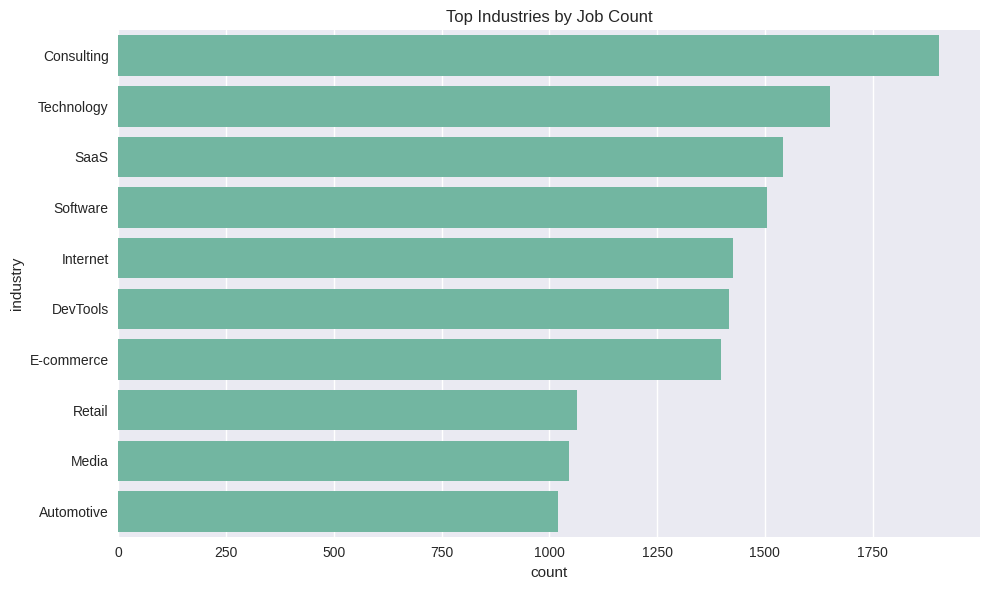

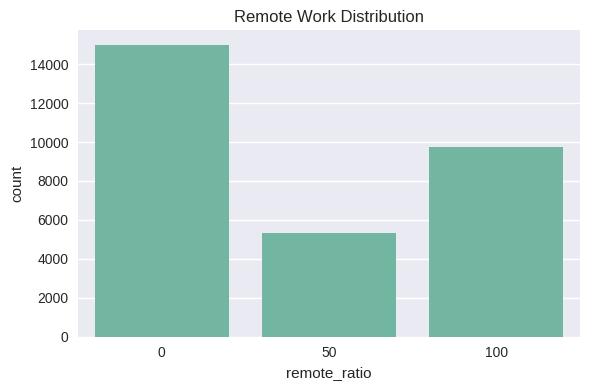

In [ ]:
# Example: Jobs by Industry
if "industry" in df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, y="industry", order=df["industry"].value_counts().index[:10])
    plt.title("Top Industries by Job Count")
    plt.tight_layout()
    plt.savefig(f"{OUTPUTS_PATH}/jobs_by_industry.png")
    plt.show()

# Example: Remote work ratio
if "remote_ratio" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="remote_ratio")
    plt.title("Remote Work Distribution")
    plt.tight_layout()
    plt.savefig(f"{OUTPUTS_PATH}/remote_ratio.png")
    plt.show()